In [24]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from properties.data.database import DatabaseContext

First of all we clean the data removing any columns that are not valuable:

In [67]:
db = DatabaseContext('properties')
df = db.as_df()
df = df[(df['stories'] < 7) & (df['garage_spaces'] < 7)]
df['market_value'].replace('', np.nan, inplace=True)
df.dropna(subset=['market_value'], inplace=True)
df['market_value'] = df['market_value'].astype(float)
df = df.drop(columns=['sale_date', 'latitude', 'longitude', 'total_area', 'market_value'])

Now we normalize our distance data

In [68]:
mms = MinMaxScaler()
df[['museum', 'gas_station', 'coffee_shop', 'stadium',
       'food', 'bar', 'gym', 'bridge', 'garden', 'park', 'river', 'city_hall',
       'police_station', 'hospital', 'elementary_school', 'church', 'bank',
       'supermarket', 'pharmacy', 'bus_stop', 'metro_station', 'train_station',
       'university', 'laundromat']] = mms.fit_transform(df[['museum', 'gas_station', 'coffee_shop', 'stadium',
       'food', 'bar', 'gym', 'bridge', 'garden', 'park', 'river', 'city_hall',
       'police_station', 'hospital', 'elementary_school', 'church', 'bank',
       'supermarket', 'pharmacy', 'bus_stop', 'metro_station', 'train_station',
       'university', 'laundromat']])

And our final data becomes

In [69]:
# Our data
y = df['sale_price']
X1 = df.drop(columns=['sale_price'])

## One Hot

In [70]:
def one_hot(df, columns):
    for column in columns:
        oh = pd.get_dummies(df[column], prefix=column)
        df = df.drop(column, axis=1)
        df = pd.concat([df, oh], axis=1)
    return df

In [82]:
X = one_hot(X1, ['bedrooms', 'bathrooms', 'stories', 'fireplaces', 'garage_spaces'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
y_train.describe()

count    6.404000e+03
mean     3.234000e+05
std      2.722169e+05
min      2.011800e+04
25%      1.650000e+05
50%      2.622500e+05
75%      3.980000e+05
max      3.100000e+06
Name: sale_price, dtype: float64

## Running SVR

In [75]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)

/Users/nacho/School/Applied Machine Learning/real-estate-ml/.env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
y_pred = clf.predict(X_test)

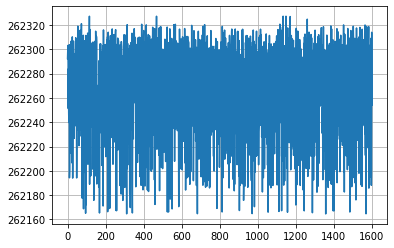

In [77]:
fig, ax = plt.subplots()
ax.plot(y_pred)

ax.grid()

plt.show()